# Data

Dataset is obtained from a B2C model. This means that the clients are individual people rather than firms or institutions.This comes from a fast moving consumer goods or FMCG sector.

Purchase Data (**Purchase_data**)
1. Each observation is a transaction rather than a customer. Therefore different observations can be related to the same customer.
2. The entire dataset consist purchase of only one product type.
3. The segementation dataset features are merged in this dataset. 

# Reading Data

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

**Importing Models**

In [ ]:
df_pur=pd.read_csv('Purchase_data.csv')
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))
# Standardization
features = df_pur[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_pur_seg_std = scaler.transform(features)
# Application of PCA
df_pur_seg_pca = pca.transform(df_pur_seg_std)
# Segment data
pur_seg_kmeans_pca = kmeans_pca.predict(df_pur_seg_pca)
# Creation of a copy of the dataframe
df_pur_predictors = df_pur.copy()
# Addition of Segment Labels
df_pur_predictors['Segment'] = pur_seg_kmeans_pca
seg_dumm = pd.get_dummies(pur_seg_kmeans_pca, prefix = 'Segment', prefix_sep = '-')
df_pur_predictors = pd.concat([df_pur_predictors, seg_dumm], axis = 1)
# Creation of new dataframe for predictive analysis
df_pa = df_pur_predictors

# Purchase Probability Model

In [ ]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

The purchase of each customer is noted in the dataset under incidence feature in a binary foormat, where 0 indicates no purchase and 1 indicates a purchase. Since it is a binary feature and requires to solve in a probability terms, Logistic Regression model seems to fit.

Solver **sag** is used as it is faster than other solvers for large dataset, when both the number of samples and the number of features are large.  

In [ ]:
# Model implementation
model_pur = LogisticRegression(solver = 'sag')
model_pur.fit(X,Y)
model_pur.coef_        

array([[-2.34849478]])

Negative coefficient indicates that with increase in price, purchase probability decreases.

# Price Elasticity of Purchase Probability

In [ ]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


The minimum price is 1.1 and the maximum price is 2.8. This range needs to be expanded in order to gain a better understanding of how the purchase probabilities and the respective elasticities change.

So opting for the range between 0.5 and 3.5.

In [ ]:
pr_range = np.arange(0.5,3.5,0.01)     #Price range to examine purchase probability, total 300 values
df_pr_range = pd.DataFrame(pr_range)

In [ ]:
Y_pr = model_pur.predict_proba(df_pr_range)  # The class probabilities for our 2 classes 0 and 1.
pur_pr = Y_pr[:][:,1]                        # Only interested in class 1 probabilities, i.e, purchase probabilities
pr_elas = model_pur.coef_[:,0] * pr_range * (1 - pur_pr)  # Price Elasticity Formula application

Price elasticity = (1 - purchase probability) * model coefficient of price * actual price

In [ ]:
# Creation of new dataframe storing elasticities
df_pr_elast = pd.DataFrame(pr_range)
df_pr_elast = df_pr_elast.rename(columns = {0:'Price Point'})
df_pr_elast['Mean Price Elasticity'] = pr_elas
pd.options.display.max_rows = None
df_pr_elast

,Price Point,Mean Price Elasticity
0,0.50,-0.096428
1,0.51,-0.100497
2,0.52,-0.104694
3,0.53,-0.109021
4,0.54,-0.113481
5,0.55,-0.118078
6,0.56,-0.122815
7,0.57,-0.127696
8,0.58,-0.132723
9,0.59,-0.137900


Text(0.5, 1.0, 'Price Elasticity of purchase probability')

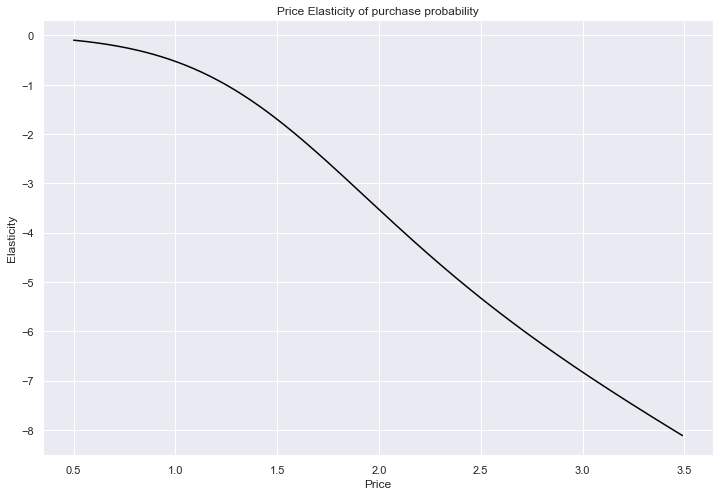

In [ ]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elas,color='black')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of purchase probability')



*   The price elasticity decreases as price increases, as higher the price people are less likely to buy it.
*   The rate is slow in price range 0.5 to 1.2 and then it become steeper after 1
*   The price elasticities are all negative due to the fact that the model price coefficient is negative, i.e, -2.35. It shows inverse proportionality between price and purchase probability.
*   At price 1.1, the elasticity is -0.69 and increase of 1 percent in elasticity leads to a decrease of less than 1 percent in price. Therefore, purchase probability at this point is inelastic.
*   At price 1.5, elasticity is -1.7 and increase of 1 percent in price translates into decline of almost 2 percent of purchase probability. Therefore, purchase probability at this point is elastic.
*   The point of inflection (where the graph changes from inelastic to elastic) is at price 1.25. Hence, we can increase product prices lower than 1.25 and decrease product prices higher than 1.25 without losing too much in terms of purchase probability.





# Purchase Probabilities by Segments

**Standard Customers**

Text(0.5, 1.0, 'Price Elasticity of purchase probability')

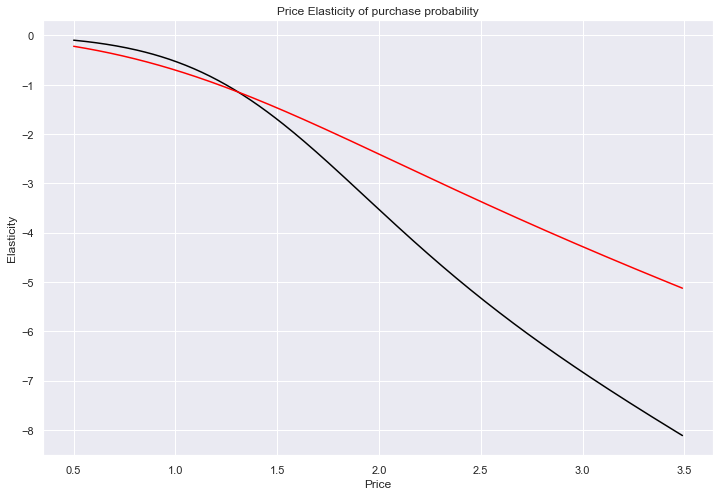

In [ ]:
df_pa_seg0 = df_pa[df_pa['Segment'] == 0]
Y = df_pa_seg0['Incidence']
X = pd.DataFrame()
X['Mean Price'] = (df_pa_seg0['Price_1'] +
                   df_pa_seg0['Price_2'] +
                   df_pa_seg0['Price_3'] +
                   df_pa_seg0['Price_4'] +
                   df_pa_seg0['Price_5'] ) / 5

model_inci_seg0 = LogisticRegression(solver = 'sag')
model_inci_seg0.fit(X,Y)

Y_seg0 = model_inci_seg0.predict_proba(df_pr_range)
pur_pr_seg0 = Y_seg0[:][:,1]
pr_elas_seg0 = model_inci_seg0.coef_[:,0] * pr_range * (1 - pur_pr_seg0)

df_pr_elast['Price Elasticity Segment 0'] = pr_elas_seg0

plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elas,color='black')
plt.plot(pr_range,pr_elas_seg0,color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of purchase probability')

The point of inflection for Standard Customers is at price 1.22, so product prices needs to be increased for prices lower than 1.22 and decreased for prices higher than 1.22.

**Career Focused Customers**

Text(0.5, 1.0, 'Price Elasticity of purchase probability')

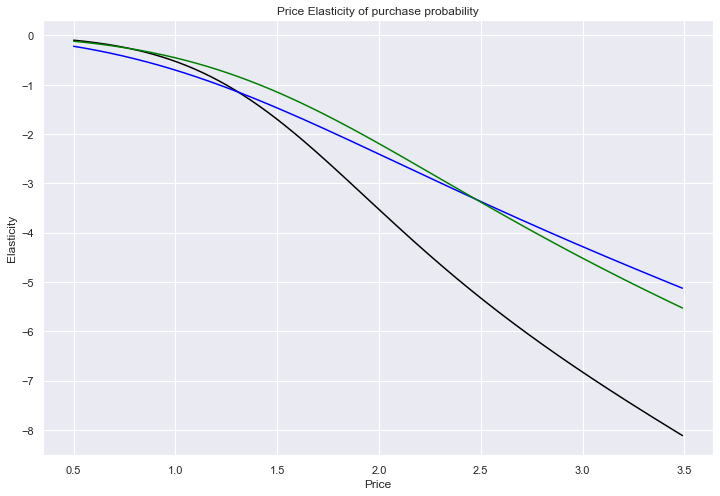

In [ ]:
df_pa_seg1 = df_pa[df_pa['Segment'] == 1]
Y = df_pa_seg1['Incidence']
X = pd.DataFrame()
X['Mean Price'] = (df_pa_seg1['Price_1'] +
                   df_pa_seg1['Price_2'] +
                   df_pa_seg1['Price_3'] +
                   df_pa_seg1['Price_4'] +
                   df_pa_seg1['Price_5'] ) / 5

model_inci_seg1 = LogisticRegression(solver = 'sag')
model_inci_seg1.fit(X,Y)

Y_seg1 = model_inci_seg1.predict_proba(df_pr_range)
pur_pr_seg1 = Y_seg1[:][:,1]
pr_elas_seg1 = model_inci_seg1.coef_[:,0] * pr_range * (1 - pur_pr_seg1)

df_pr_elast['Price Elasticity Segment 1'] = pr_elas_seg1

plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elas,color='black')
plt.plot(pr_range,pr_elas_seg0,color='blue')
plt.plot(pr_range,pr_elas_seg1,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of purchase probability')

The point of inflection for Career Focused Customers is at price 1.42, so product prices needs to be increased for prices lower than 1.42 and decreased for prices higher than 1.42.

**Fewer Opportunities**

Text(0.5, 1.0, 'Price Elasticity of purchase probability')

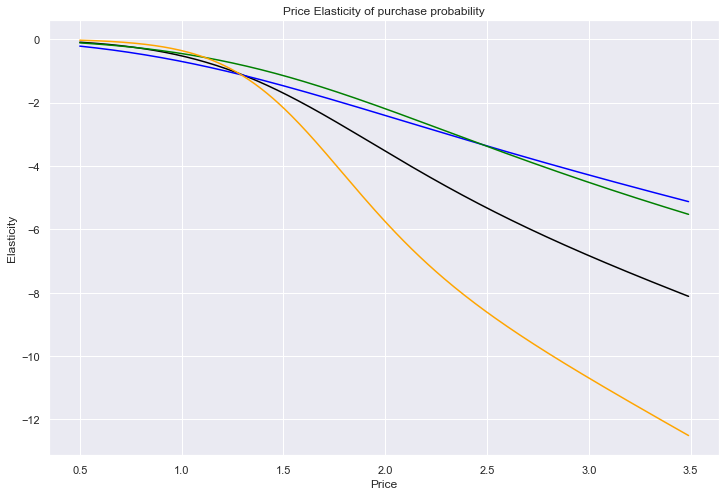

In [ ]:
df_pa_seg2 = df_pa[df_pa['Segment'] == 2]
Y = df_pa_seg2['Incidence']
X = pd.DataFrame()
X['Mean Price'] = (df_pa_seg2['Price_1'] +
                   df_pa_seg2['Price_2'] +
                   df_pa_seg2['Price_3'] +
                   df_pa_seg2['Price_4'] +
                   df_pa_seg2['Price_5'] ) / 5

model_inci_seg2 = LogisticRegression(solver = 'sag')
model_inci_seg2.fit(X,Y)

Y_seg2 = model_inci_seg2.predict_proba(df_pr_range)
pur_pr_seg2 = Y_seg2[:][:,1]
pr_elas_seg2 = model_inci_seg2.coef_[:,0] * pr_range * (1 - pur_pr_seg2)

df_pr_elast['Price Elasticity Segment 2'] = pr_elas_seg2

plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elas,color='black')
plt.plot(pr_range,pr_elas_seg0,color='blue')
plt.plot(pr_range,pr_elas_seg1,color='green')
plt.plot(pr_range,pr_elas_seg2,color='orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of purchase probability')

The point of inflection for Fewer Opportunities is at price 1.26, so product prices needs to be increased for prices lower than 1.26 and decreased for prices higher than 1.26.

**Well-Off Customers**

Text(0.5, 1.0, 'Price Elasticity of purchase probability')

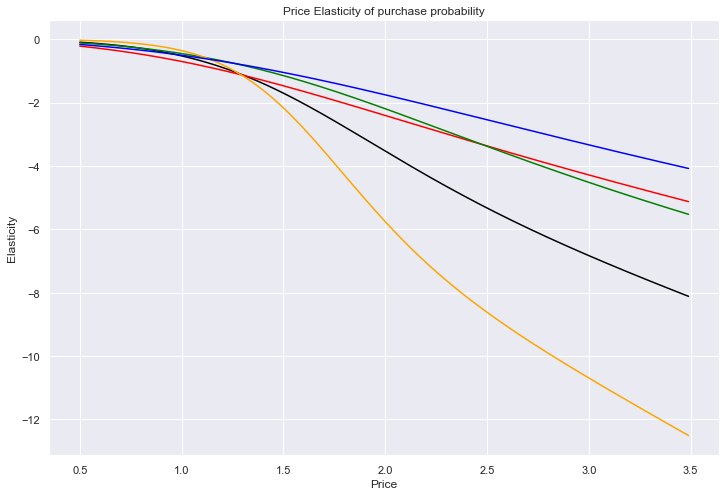

In [ ]:
df_pa_seg3 = df_pa[df_pa['Segment'] == 3]
Y = df_pa_seg3['Incidence']
X = pd.DataFrame()
X['Mean Price'] = (df_pa_seg3['Price_1'] +
                   df_pa_seg3['Price_2'] +
                   df_pa_seg3['Price_3'] +
                   df_pa_seg3['Price_4'] +
                   df_pa_seg3['Price_5'] ) / 5

model_inci_seg3 = LogisticRegression(solver = 'sag')
model_inci_seg3.fit(X,Y)

Y_seg3 = model_inci_seg3.predict_proba(df_pr_range)
pur_pr_seg3 = Y_seg3[:][:,1]
pr_elas_seg3 = model_inci_seg3.coef_[:,0] * pr_range * (1 - pur_pr_seg3)

df_pr_elast['Price Elasticity Segment 3'] = pr_elas_seg3

plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elas,color='black')
plt.plot(pr_range,pr_elas_seg0,color='red')
plt.plot(pr_range,pr_elas_seg1,color='green')
plt.plot(pr_range,pr_elas_seg2,color='orange')
plt.plot(pr_range,pr_elas_seg3,color='blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of purchase probability')

The point of inflection for Well-Off Customers is at price 1.46, so product prices needs to be increased for prices lower than 1.46 and decreased for prices higher than 1.46.



*   The Fewer Opportunities (Yellow) graph is much steeper and price sensitive. It is more inelastic in low price ranges than the other segments indicating that this segment enjoys the product so much that price increase in low price range won't affect the purchase probability for this segment. However once the product starts becoming expensive it makes no sense for them to buy it.

*   On a contrary, in low price ranges Standard Customers (Red) graph is less inelastic than others indicating that  increase in price at low range will severely affect the purchase probability for this segment.
*   For high price ranges, Well-Off Customers (Blue graph) seems to enjoys the expensive brand of product and increase in price of the expensive brand of product doesn't affect their purchase probability compared to other segments.



# Purchase Probability with Promotion

In [ ]:
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

X['Mean Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5

X.head()

,Mean Price,Mean Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


**Model Estimation**

In [ ]:
model_inci_prom = LogisticRegression(solver = 'sag')
model_inci_prom.fit(X,Y)
model_inci_prom.coef_

array([[-1.4939468 ,  0.56155475]])

Coefficients are -1.49 for price and 0.56 for promotion. The positive coefficient of promotion indicates that with increase in promotion, purchase probability also increases.

**Price Elasticity with Promotion**

In [ ]:
df_pr_elast_prom = pd.DataFrame(pr_range)
df_pr_elast_prom = df_pr_elast_prom.rename(columns = {0:'Price Range'})

df_pr_elast_prom['Promotion'] = 1

Y_prom = model_inci_prom.predict_proba(df_pr_elast_prom)

prom = Y_prom[:,1]
pr_elast_prom = (model_inci_prom.coef_[:,0] * pr_range) * (1 - prom)

df_pr_elast['Elasticity of Promotion 1'] = pr_elast_prom
df_pr_elast

,Price Point,Mean Price Elasticity,Price Elasticity Segment 0,Price Elasticity Segment 1,Price Elasticity Segment 2,Price Elasticity Segment 3,Elasticity of Promotion 1
0,0.50,-0.096428,-0.220018,-0.117636,-0.032862,-0.168006,-0.125746
1,0.51,-0.100497,-0.226823,-0.121699,-0.034721,-0.172929,-0.129862
2,0.52,-0.104694,-0.233737,-0.125849,-0.036669,-0.177923,-0.134057
3,0.53,-0.109021,-0.240762,-0.130089,-0.038712,-0.182987,-0.138333
4,0.54,-0.113481,-0.247898,-0.134419,-0.040853,-0.188123,-0.142689
5,0.55,-0.118078,-0.255145,-0.138840,-0.043097,-0.193330,-0.147127
6,0.56,-0.122815,-0.262505,-0.143355,-0.045447,-0.198610,-0.151648
7,0.57,-0.127696,-0.269978,-0.147963,-0.047909,-0.203963,-0.156253
8,0.58,-0.132723,-0.277564,-0.152668,-0.050487,-0.209388,-0.160943
9,0.59,-0.137900,-0.285265,-0.157469,-0.053187,-0.214888,-0.165719


**Price Elasticity without Promotion**

Text(0.5, 1.0, 'Price Elasticity of purchase probability with and without Promotion')

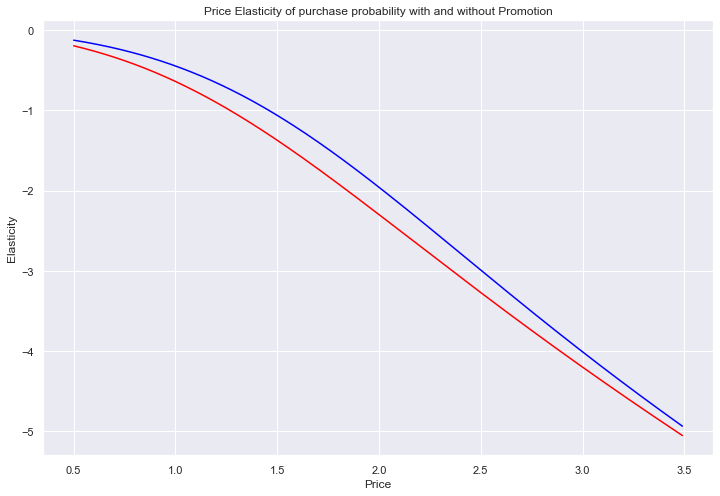

In [ ]:
df_pr_elast_nprom = pd.DataFrame(pr_range)
df_pr_elast_nprom = df_pr_elast_nprom.rename(columns = {0: 'Price Range'})

df_pr_elast_nprom['Promotion'] = 0

Y_nprom = model_inci_prom.predict_proba(df_pr_elast_nprom)

nprom = Y_nprom[:,1]
pr_elast_nprom = (model_inci_prom.coef_[:,0] * pr_range) * (1 - nprom)

df_pr_elast['Elasticity of Promotion 0'] = pr_elast_nprom

plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elast_nprom,color='red')
plt.plot(pr_range,pr_elast_prom,color='blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of purchase probability with and without Promotion')

The price elasticity of purchase probability with promotion (Blue Graph) is greater than price elasticity of purchase probability without promotion (Red Graph) for the entire price range.

The inelasticity ends at price 1.27 without promotion and with promotion at price 1.46. So if the product has a regular price of 1.37 then the purchase probability is elastic. If the product has regular price of 1.57 and with promotion it is reduced to 1.37 the purchase probability is inelastic. It means that people tends to buy this product rather than the regular price of 1.37 without promotion.

# Brand Choice

In [ ]:
br_c = df_pa[df_pa['Incidence'] == 1]

Y = br_c['Brand']
br_c.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment-0', 'Segment-1', 'Segment-2', 'Segment-3'], dtype=object)

In [ ]:
# Feature Selection
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']

X = br_c[features]
# Multiple brands are to be processed and hence multinomial logistic regression
model_br_c = LogisticRegression(solver='sag',multi_class='multinomial')
model_br_c.fit(X,Y)
model_br_c.coef_

array([[-3.91595975,  0.658454  ,  2.4177018 ,  0.70408263, -0.20211072],
       [ 1.27461285, -1.87985693, -0.21264315, -0.20634044,  0.58787058],
       [ 1.62418896,  0.56212043,  0.50089639,  1.03950891,  0.4527881 ],
       [ 0.57453777,  0.39558594, -1.40060561, -1.24624369,  0.24935109],
       [ 0.44262017,  0.26369656, -1.30534943, -0.2910074 , -1.08789905]])

In [ ]:
br_coef = pd.DataFrame(model_br_c.coef_)
br_coef

,0,1,2,3,4
0,-3.915960,0.658454,2.417702,0.704083,-0.202111
1,1.274613,-1.879857,-0.212643,-0.206340,0.587871
2,1.624189,0.562120,0.500896,1.039509,0.452788
3,0.574538,0.395586,-1.400606,-1.246244,0.249351
4,0.442620,0.263697,-1.305349,-0.291007,-1.087899


In [ ]:
br_coef = pd.DataFrame(np.transpose(model_br_c.coef_))
coeff = ['Coeff Brand 1','Coeff Brand 2','Coeff Brand 3','Coeff Brand 4','Coeff Brand 5']
br_coef.columns = [coeff]
pr = ['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
br_coef.index = [pr]
br_coef = br_coef.round(2)
br_coef

,Coeff Brand 1,Coeff Brand 2,Coeff Brand 3,Coeff Brand 4,Coeff Brand 5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


*   Brand-1 coefficient is negative with self implying that increase in price of own brand will lower the probability of purchase.
*   Brand-2 coefficients are negative with 2 competitive brands and they are equal. It implies that price changein Brand-2 will affect purchase probability of these 2 brands alike.
*   Brand-3 coefficients are positive with every other competitive brands and also with self. It has high purchase probability as soon as any other competitive brands increase thier prices.

**Own (Self) Brand Elasticity**

Brand-5 provides the greatest total revenue to the store and hence brand5 analysis is most important. Hence, Brand-5 own brand elasticity has been chosen for the analysis.

In [ ]:
# Creation of new dataframe
df_own_br5 = pd.DataFrame(index=np.arange(pr_range.size))
# Brand-5 will contain prince range, Across other brands price will be fixed,i.e, the mean price
df_own_br5['Price_1'] = br_c['Price_1'].mean()
df_own_br5['Price_2'] = br_c['Price_2'].mean()
df_own_br5['Price_3'] = br_c['Price_3'].mean()
df_own_br5['Price_4'] = br_c['Price_4'].mean()
df_own_br5['Price_5'] = pr_range
df_own_br5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
5,1.384559,1.764717,2.006694,2.159658,0.55
6,1.384559,1.764717,2.006694,2.159658,0.56
7,1.384559,1.764717,2.006694,2.159658,0.57
8,1.384559,1.764717,2.006694,2.159658,0.58
9,1.384559,1.764717,2.006694,2.159658,0.59


In [ ]:
# Predicting probabilities
pred_br5 = model_br_c.predict_proba(df_own_br5)

In [ ]:
pr_own_br5 = pred_br5[:][:,4]

In [ ]:
# Own elasticity
own_pr_elast_br5= (br_coef.iloc[4,4] * pr_range) * (1 - pr_own_br5)
df_pr_elast['Brand 5'] = own_pr_elast_br5
pd.options.display.max_rows = None 
df_pr_elast

,Price Point,Mean Price Elasticity,Price Elasticity Segment 0,Price Elasticity Segment 1,Price Elasticity Segment 2,Price Elasticity Segment 3,Elasticity of Promotion 1,Elasticity of Promotion 0,Brand 5
0,0.50,-0.096428,-0.220018,-0.117636,-0.032862,-0.168006,-0.125746,-0.195666,-0.049055
1,0.51,-0.100497,-0.226823,-0.121699,-0.034721,-0.172929,-0.129862,-0.201788,-0.050616
2,0.52,-0.104694,-0.233737,-0.125849,-0.036669,-0.177923,-0.134057,-0.208012,-0.052207
3,0.53,-0.109021,-0.240762,-0.130089,-0.038712,-0.182987,-0.138333,-0.214340,-0.053827
4,0.54,-0.113481,-0.247898,-0.134419,-0.040853,-0.188123,-0.142689,-0.220771,-0.055477
5,0.55,-0.118078,-0.255145,-0.138840,-0.043097,-0.193330,-0.147127,-0.227308,-0.057158
6,0.56,-0.122815,-0.262505,-0.143355,-0.045447,-0.198610,-0.151648,-0.233950,-0.058871
7,0.57,-0.127696,-0.269978,-0.147963,-0.047909,-0.203963,-0.156253,-0.240699,-0.060615
8,0.58,-0.132723,-0.277564,-0.152668,-0.050487,-0.209388,-0.160943,-0.247555,-0.062391
9,0.59,-0.137900,-0.285265,-0.157469,-0.053187,-0.214888,-0.165719,-0.254519,-0.064200


Text(0.5, 1.0, 'Own price elasticity of purchase probability for Brand 5')

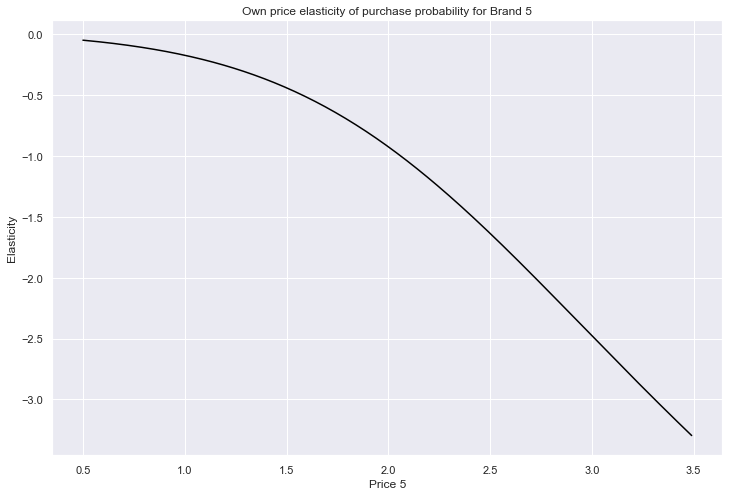

In [ ]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(pr_range,own_pr_elast_br5, color='black')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own price elasticity of purchase probability for Brand 5')

**Cross Elasticity of Brand-5 and Brand-4**

In [ ]:
# creation of new dataframe for Brand-4 prices and elasticities
df_br5_cr_br4 = pd.DataFrame(index=np.arange(pr_range.size))
df_br5_cr_br4['Price 1'] = br_c['Price_1'].mean()
df_br5_cr_br4['Price 2'] = br_c['Price_2'].mean()
df_br5_cr_br4['Price 3'] = br_c['Price_3'].mean()
df_br5_cr_br4['Price 4'] = pr_range
df_br5_cr_br4['Price 5'] = br_c['Price_5'].mean()
df_br5_cr_br4

,Price 1,Price 2,Price 3,Price 4,Price 5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
5,1.384559,1.764717,2.006694,0.55,2.654296
6,1.384559,1.764717,2.006694,0.56,2.654296
7,1.384559,1.764717,2.006694,0.57,2.654296
8,1.384559,1.764717,2.006694,0.58,2.654296
9,1.384559,1.764717,2.006694,0.59,2.654296


In [ ]:
pred_br5_cr_br4 = model_br_c.predict_proba(df_br5_cr_br4)
pr_br4 = pred_br5_cr_br4[:][:,3]
# Elasticity of Brand-4
br5_cr_br4_pr_elast = (-br_coef.iloc[4,4] * pr_range) * pr_br4
df_pr_elast['Brand 5 Cross Brand 4'] = br5_cr_br4_pr_elast

Text(0.5, 1.0, 'Cross Price Elasticity of brand 5 wrt brand 4')

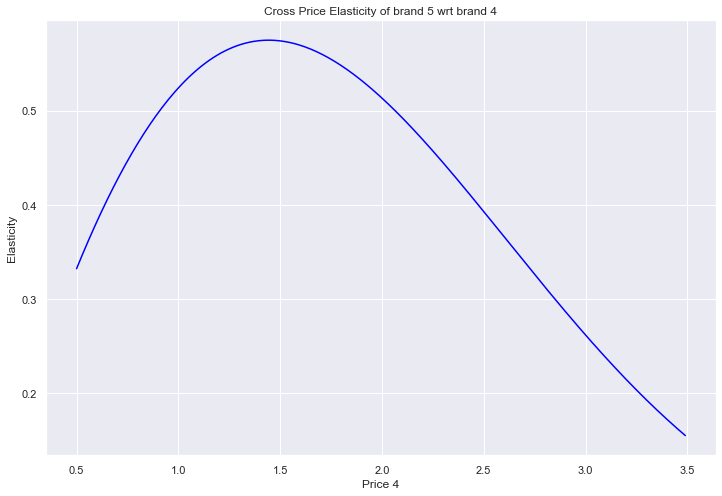

In [ ]:
# Visualization
plt.figure(figsize=(12,8))
plt.plot(pr_range,br5_cr_br4_pr_elast, color='blue')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of brand 5 wrt brand 4')

1. The elasticities are all positive across the price range. It indicates that if the competitor Brand-4 increase prices, the purchase probability for Brand-5 will increase.

2. However, if the cross price elasticities are positive the two brands are considered substitutes. If the cross price elasticity at some price point is greater in absolute terms than our self price elasticity then the alternative brand is considered a strong substitute.

3. Here, Brand-4 is strong substitute for Brand-5 for all prices upto 1.65. However, this range is not available for Brand-4 as minimum price value of Brand-4 is 1.76. Therefore, Brand-5 can increase its product prices and gain market share from Brand-4 in this range.

4. In the range of Brand-4, i.e, from prices 1.76 to 2.26, the elasticity is steadily decreasing. This means that with increase in price the purchase probability will increase slowly. So, keeping in mind of average customer Brand-4 is weaker substitute of Brand-5.

# Self and Cross Elasticities by Segments

**Standard Customers**

In [ ]:
br_choice_seg0 = df_pa[df_pa['Incidence'] == 1]
br_choice_seg0 = br_choice_seg0[br_choice_seg0['Segment'] == 0]

Y = br_choice_seg0['Brand']
br_choice_seg0 = pd.get_dummies(br_choice_seg0, columns = ['Brand'], prefix = 'Brand', prefix_sep = '-')
X=br_choice_seg0[features]
model_br_choice_seg0 = LogisticRegression(solver='sag',multi_class = 'multinomial', max_iter = 250)
model_br_choice_seg0.fit(X,Y)

br_coeff = pd.DataFrame(np.transpose(model_br_choice_seg0.coef_))
br_coeff.columns = [coeff]
br_coeff.index = [pr]
br_coeff = br_coeff.round(2)

df_own_br5_seg0 = pd.DataFrame(index= np.arange(pr_range.size))
df_own_br5_seg0['Price 1'] = br_choice_seg0['Price_1'].mean()
df_own_br5_seg0['Price 2'] = br_choice_seg0['Price_2'].mean()
df_own_br5_seg0['Price 3'] = br_choice_seg0['Price_3'].mean()
df_own_br5_seg0['Price 4'] = br_choice_seg0['Price_4'].mean()
df_own_br5_seg0['Price 5'] = pr_range

pred_own_br5_seg0 = model_br_choice_seg0.predict_proba(df_own_br5_seg0)
pr_own_br5_seg0 = pred_own_br5_seg0[:][:,4]
own_pr_elast_br5_seg0 = br_coef.iloc[4,4] * pr_range * (1 - pr_own_br5_seg0)
df_pr_elast.insert(10,column = 'Brand 5 Seg0',value=own_pr_elast_br5_seg0)

df_br5_cr_br4_seg0 = pd.DataFrame(index= np.arange(pr_range.size))
df_br5_cr_br4_seg0['Price 1'] = br_choice_seg0['Price_1'].mean()
df_br5_cr_br4_seg0['Price 2'] = br_choice_seg0['Price_2'].mean()
df_br5_cr_br4_seg0['Price 3'] = br_choice_seg0['Price_3'].mean()
df_br5_cr_br4_seg0['Price 4'] = pr_range
df_br5_cr_br4_seg0['Price 5'] = br_choice_seg0['Price_5'].mean()

pred_br5_cr_br4_seg0 = model_br_choice_seg0.predict_proba(df_br5_cr_br4_seg0)
pr_cr_br5_seg0 = pred_br5_cr_br4_seg0[:][:,3]

br5_cr_br4_pr_elast_seg0 = (-br_coef.iloc[4,4] * pr_range) * pr_cr_br5_seg0
df_pr_elast.insert(11,column = 'Brand5 cross Brand4 Seg0',value = br5_cr_br4_pr_elast_seg0)

**Career Focused Customers**

In [ ]:
br_choice_seg1 = df_pa[df_pa['Incidence'] == 1]
br_choice_seg1 = br_choice_seg1[br_choice_seg1['Segment'] == 1]

Y = br_choice_seg1['Brand']
br_choice_seg1 = pd.get_dummies(br_choice_seg1, columns = ['Brand'], prefix = 'Brand', prefix_sep = '-')
X=br_choice_seg1[features]
model_br_choice_seg1 = LogisticRegression(solver='sag',multi_class = 'multinomial', max_iter = 250)
model_br_choice_seg1.fit(X,Y)

br_coeff = pd.DataFrame(np.transpose(model_br_choice_seg1.coef_))
br_coeff.columns = [coeff]
br_coeff.index = [pr]
br_coeff = br_coeff.round(2)

df_own_br5_seg1 = pd.DataFrame(index= np.arange(pr_range.size))
df_own_br5_seg1['Price 1'] = br_choice_seg1['Price_1'].mean()
df_own_br5_seg1['Price 2'] = br_choice_seg1['Price_2'].mean()
df_own_br5_seg1['Price 3'] = br_choice_seg1['Price_3'].mean()
df_own_br5_seg1['Price 4'] = br_choice_seg1['Price_4'].mean()
df_own_br5_seg1['Price 5'] = pr_range

pred_own_br5_seg1 = model_br_choice_seg1.predict_proba(df_own_br5_seg1)
pr_own_br5_seg1 = pred_own_br5_seg1[:][:,4]
own_pr_elast_br5_seg1 = br_coef.iloc[4,4] * pr_range * (1 - pr_own_br5_seg1)
df_pr_elast.insert(12,column = 'Brand 5 Seg1',value=own_pr_elast_br5_seg1)

df_br5_cr_br4_seg1 = pd.DataFrame(index= np.arange(pr_range.size))
df_br5_cr_br4_seg1['Price 1'] = br_choice_seg1['Price_1'].mean()
df_br5_cr_br4_seg1['Price 2'] = br_choice_seg1['Price_2'].mean()
df_br5_cr_br4_seg1['Price 3'] = br_choice_seg1['Price_3'].mean()
df_br5_cr_br4_seg1['Price 4'] = pr_range
df_br5_cr_br4_seg1['Price 5'] = br_choice_seg1['Price_5'].mean()

pred_br5_cr_br4_seg1 = model_br_choice_seg1.predict_proba(df_br5_cr_br4_seg1)
pr_cr_br5_seg1 = pred_br5_cr_br4_seg1[:][:,3]

br5_cr_br4_pr_elast_seg1 = (-br_coef.iloc[4,4] * pr_range) * pr_cr_br5_seg1
df_pr_elast.insert(13,column = 'Brand5 cross Brand4 Seg1',value = br5_cr_br4_pr_elast_seg1)

**Fewer Opportunities**

In [ ]:
br_choice_seg2 = df_pa[df_pa['Incidence'] == 1]
br_choice_seg2 = br_choice_seg2[br_choice_seg2['Segment'] == 2]

Y = br_choice_seg2['Brand']
br_choice_seg2 = pd.get_dummies(br_choice_seg2, columns = ['Brand'], prefix = 'Brand', prefix_sep = '-')
X=br_choice_seg2[features]
model_br_choice_seg2 = LogisticRegression(solver='sag',multi_class = 'multinomial', max_iter = 250)
model_br_choice_seg2.fit(X,Y)

br_coeff = pd.DataFrame(np.transpose(model_br_choice_seg2.coef_))
br_coeff.columns = [coeff]
br_coeff.index = [pr]
br_coeff = br_coeff.round(2)

df_own_br5_seg2 = pd.DataFrame(index= np.arange(pr_range.size))
df_own_br5_seg2['Price 1'] = br_choice_seg2['Price_1'].mean()
df_own_br5_seg2['Price 2'] = br_choice_seg2['Price_2'].mean()
df_own_br5_seg2['Price 3'] = br_choice_seg2['Price_3'].mean()
df_own_br5_seg2['Price 4'] = br_choice_seg2['Price_4'].mean()
df_own_br5_seg2['Price 5'] = pr_range

pred_own_br5_seg2 = model_br_choice_seg2.predict_proba(df_own_br5_seg2)
pr_own_br5_seg2 = pred_own_br5_seg0[:][:,4]
own_pr_elast_br5_seg2 = br_coef.iloc[4,4] * pr_range * (1 - pr_own_br5_seg2)
df_pr_elast.insert(14,column = 'Brand 5 Seg2',value=own_pr_elast_br5_seg2)

df_br5_cr_br4_seg2 = pd.DataFrame(index= np.arange(pr_range.size))
df_br5_cr_br4_seg2['Price 1'] = br_choice_seg2['Price_1'].mean()
df_br5_cr_br4_seg2['Price 2'] = br_choice_seg2['Price_2'].mean()
df_br5_cr_br4_seg2['Price 3'] = br_choice_seg2['Price_3'].mean()
df_br5_cr_br4_seg2['Price 4'] = pr_range
df_br5_cr_br4_seg2['Price 5'] = br_choice_seg2['Price_5'].mean()

pred_br5_cr_br4_seg2 = model_br_choice_seg2.predict_proba(df_br5_cr_br4_seg2)
pr_cr_br5_seg2 = pred_br5_cr_br4_seg2[:][:,3]

br5_cr_br4_pr_elast_seg2 = (-br_coef.iloc[4,4] * pr_range) * pr_cr_br5_seg2
df_pr_elast.insert(15,column = 'Brand5 cross Brand4 Seg2',value = br5_cr_br4_pr_elast_seg2)

**Well-Off Customers**

In [ ]:
br_choice_seg3 = df_pa[df_pa['Incidence'] == 1]
br_choice_seg3 = br_choice_seg3[br_choice_seg3['Segment'] == 3]

Y = br_choice_seg3['Brand']
br_choice_seg3 = pd.get_dummies(br_choice_seg3, columns = ['Brand'], prefix = 'Brand', prefix_sep = '-')
X=br_choice_seg3[features]
model_br_choice_seg3 = LogisticRegression(solver='sag',multi_class = 'multinomial', max_iter = 250)
model_br_choice_seg3.fit(X,Y)

br_coeff = pd.DataFrame(np.transpose(model_br_choice_seg3.coef_))
br_coeff.columns = [coeff]
br_coeff.index = [pr]
br_coeff = br_coeff.round(2)

df_own_br5_seg3 = pd.DataFrame(index= np.arange(pr_range.size))
df_own_br5_seg3['Price 1'] = br_choice_seg3['Price_1'].mean()
df_own_br5_seg3['Price 2'] = br_choice_seg3['Price_2'].mean()
df_own_br5_seg3['Price 3'] = br_choice_seg3['Price_3'].mean()
df_own_br5_seg3['Price 4'] = br_choice_seg3['Price_4'].mean()
df_own_br5_seg3['Price 5'] = pr_range

pred_own_br5_seg3 = model_br_choice_seg3.predict_proba(df_own_br5_seg3)
pr_own_br5_seg3 = pred_own_br5_seg3[:][:,4]
own_pr_elast_br5_seg3 = br_coef.iloc[4,4] * pr_range * (1 - pr_own_br5_seg3)
df_pr_elast.insert(16,column = 'Brand 5 Seg3',value=own_pr_elast_br5_seg3)

df_br5_cr_br4_seg3 = pd.DataFrame(index= np.arange(pr_range.size))
df_br5_cr_br4_seg3['Price 1'] = br_choice_seg3['Price_1'].mean()
df_br5_cr_br4_seg3['Price 2'] = br_choice_seg3['Price_2'].mean()
df_br5_cr_br4_seg3['Price 3'] = br_choice_seg3['Price_3'].mean()
df_br5_cr_br4_seg3['Price 4'] = pr_range
df_br5_cr_br4_seg3['Price 5'] = br_choice_seg3['Price_5'].mean()

pred_br5_cr_br4_seg3 = model_br_choice_seg3.predict_proba(df_br5_cr_br4_seg3)
pr_cr_br5_seg3 = pred_br5_cr_br4_seg3[:][:,3]

br5_cr_br4_pr_elast_seg3 = (-br_coef.iloc[4,4] * pr_range) * pr_cr_br5_seg3
df_pr_elast.insert(17,column = 'Brand5 cross Brand4 Seg3',value = br5_cr_br4_pr_elast_seg3)

Text(0.5, 0, 'Price 4')

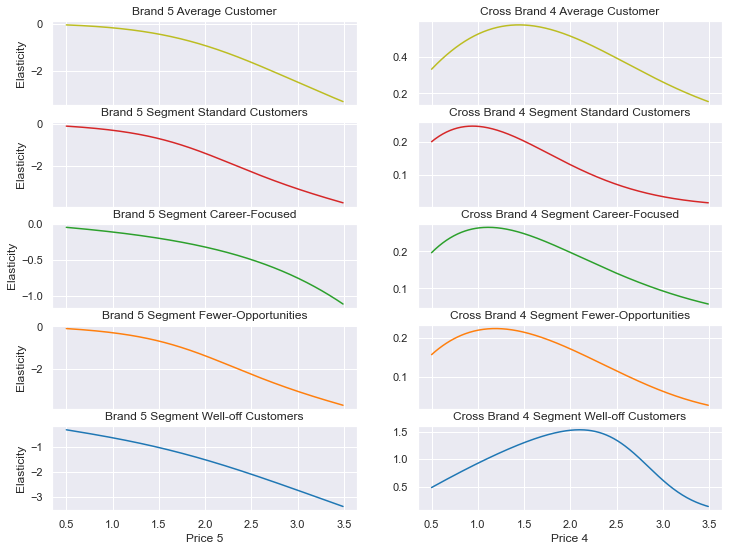

In [ ]:
# Visualization
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (12, 9), sharex = True)
ax1[0].plot(pr_range, own_pr_elast_br5, 'tab:olive')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(pr_range, br5_cr_br4_pr_elast, 'tab:olive')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(pr_range, own_pr_elast_br5_seg0, 'tab:red')
ax2[0].set_title('Brand 5 Segment Standard Customers')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(pr_range, br5_cr_br4_pr_elast_seg0,'tab:red')
ax2[1].set_title('Cross Brand 4 Segment Standard Customers')

ax3[0].plot(pr_range, own_pr_elast_br5_seg1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(pr_range, br5_cr_br4_pr_elast_seg1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(pr_range, own_pr_elast_br5_seg2, 'tab:orange')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(pr_range, br5_cr_br4_pr_elast_seg2, 'tab:orange')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(pr_range, own_pr_elast_br5_seg3, 'tab:blue')
ax5[0].set_title('Brand 5 Segment Well-off Customers')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(pr_range, br5_cr_br4_pr_elast_seg3, 'tab:blue')
ax5[1].set_title('Cross Brand 4 Segment Well-off Customers')
ax5[1].set_xlabel('Price 4')

*   Well-Off Customers are loyal to Brand-4, it is extremely important to devise a strategy targeting customers from this segment.
*   The domain of Brand-5 is 2.11 to 2.8. The Well-off Customers (Blue graph) are elastic in this range. For around price 2.4, Brand-5 can decrease 1 percent in price to gain 2 percent of purchase probability.
*   If Brand-4 chose to decrease its price by 1 percent in retaliation, Brand-5 can revise the plans and change the price by 0.75 percent and still would not lose any customers from the Well-Off Customers segment.


In terms of Brand-5 for other segments :

1.   Standard Cuustomers : More elastic than average customers. Hence, Brand-5 can increase prices to gain the customers from this segment.
2.  Career-Focused Customers : Inelastic than the average customers. So increase in prices won't affect this segment as they are loyal customers.
3. Fewer Opportunities : Own brand elastic at higher range and inelastic at lower price range and in same range of cross brand elastic as career-focused customers. So targeting this segment is not good for Brand-5. This segment is price sensitive to both Brand-4 and Brand-5.

# Price Elasticity of Purchase Quantity

In [ ]:
# Creation of new dataframe 
df_pur_quant = df_pa[df_pa['Incidence'] == 1]
df_pur_quant.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment-0,Segment-1,Segment-2,Segment-3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0


In [ ]:
# Assigning Dummies
df_pur_quant = pd.get_dummies(df_pur_quant,columns = ['Brand'] , prefix_sep ='-')
df_pur_quant.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment-0,Segment-1,Segment-2,Segment-3,Brand-1,Brand-2,Brand-3,Brand-4,Brand-5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.626657,0.152412,0.300178,0.315754,0.231657,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.001082,0.359432,0.458351,0.464831,0.421906,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_pur_quant.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment-0', 'Segment-1', 'Segment-2', 'Segment-3', 'Brand-1',
       'Brand-2', 'Brand-3', 'Brand-4', 'Brand-5'], dtype=object)

**Feature Engineering**

In [ ]:
df_pur_quant['Price Incidence'] = (df_pur_quant['Brand-1'] * df_pur_quant['Price_1'] +
                                   df_pur_quant['Brand-2'] * df_pur_quant['Price_2'] +
                                   df_pur_quant['Brand-3'] * df_pur_quant['Price_3'] +
                                   df_pur_quant['Brand-4'] * df_pur_quant['Price_4'] +
                                   df_pur_quant['Brand-5'] * df_pur_quant['Price_5'])

In [ ]:
df_pur_quant['Promotion Incidence'] = (df_pur_quant['Brand-1'] * df_pur_quant['Promotion_1'] +
                                       df_pur_quant['Brand-2'] * df_pur_quant['Promotion_2'] +
                                       df_pur_quant['Brand-3'] * df_pur_quant['Promotion_3'] +
                                       df_pur_quant['Brand-4'] * df_pur_quant['Promotion_4'] +
                                       df_pur_quant['Brand-5'] * df_pur_quant['Promotion_5'])

These two features are used for linear regression model.

**Model Estimation**

In [ ]:
X = df_pur_quant[['Price Incidence', 'Promotion Incidence']]
Y = df_pur_quant['Quantity']

model_quant = LinearRegression()
model_quant.fit(X,Y)
model_quant.coef_

array([-0.8173651 , -0.10504673])

**Price Elasticity With Promotion**

Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with promotion')

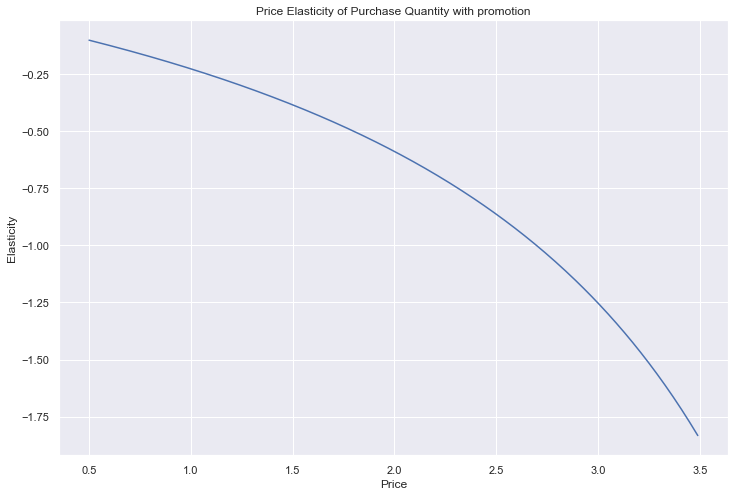

In [ ]:
df_pr_elast_quant = pd.DataFrame(index = np.arange(pr_range.size))
df_pr_elast_quant['Price Incidence'] = pr_range
df_pr_elast_quant['Promotion Incidence'] = 1

beta_quant = model_quant.coef_[0]
pred_quant = model_quant.predict(df_pr_elast_quant)

pr_elast_quant_prom = (model_quant.coef_[0] * pr_range) / pred_quant

df_pr_elast['Price Elasticity Quantity with Promotion 1'] = pr_elast_quant_prom
# Visualization
plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elast_quant_prom)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with promotion')

**Price Elasticity without Promotion**

Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with promotion')

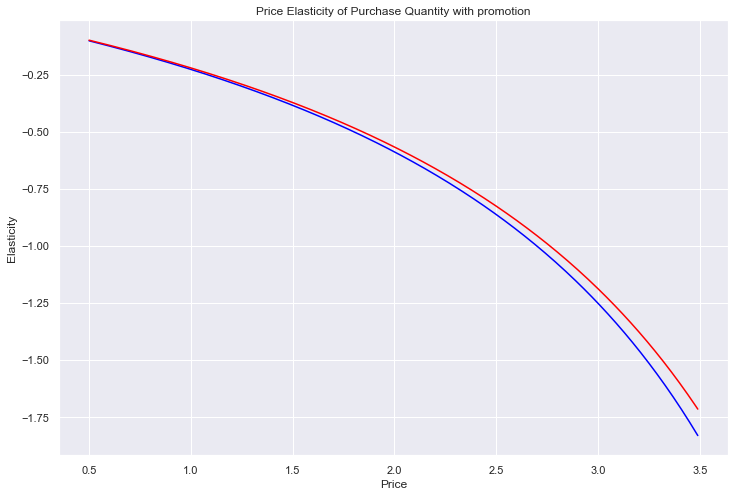

In [ ]:
df_pr_elast_quant['Promotion Incidence'] = 0
pred_quant = model_quant.predict(df_pr_elast_quant)

pr_elast_quant_nprom = (model_quant.coef_[0] * pr_range) / pred_quant

df_pr_elast['Price Elasticity Quantity with No Promotion'] = pr_elast_quant_nprom
# Visualization
plt.figure(figsize=(12,8))
plt.plot(pr_range,pr_elast_quant_prom, color = 'blue')
plt.plot(pr_range,pr_elast_quant_nprom, color = 'red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with promotion')

Customers are elastic when there is a promotion. However customers are inelastic for price range of 0.5 to 1.4. Hence, average customer is more likely to buy above the range of price 1.4 and also the product which is on promotion.